# How to Manipulate Excel Files with Python
If you need to do anything remotely complicated with Excel, it might be easier to do it with Python (particularly if you're tempted to make a script or macro). Here's some basics on how to do that!
This is assuming you already have Python installed as well as Jupyter Notebook.

Uncomment this if you have dependency issues (it'll install the packages)

In [2]:
# # dependencies
# import sys
# !{sys.executable} -m pip install pandas numpy matplotlib XlsxWriter openpyxl scikit-learn

In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Loading Data
Pandas loads data into a **DataFrame.** Compared to Numpy, it can load a larger variety of file types and is more efficient for data with >500k rows. Many times the two are used together.
- **DataFrame:** 2D table object (like an Excel file)
- **ndarray:** N dimensional numpy array (standard programming array)
- **list:** default python array (very slow! not efficient!)
- **dictionary:** default python way of storing ordered key:value pairs. (no duplicates!)

In [4]:
# load in the example excel file 
df = pd.read_excel('example.xlsx')
df.head()

,Header 1,Header 2,Header 3
0,1,5,10
1,2,10,20
2,3,15,30
3,4,20,40
4,5,25,50


- `df` is now a DataFrame object.
- `df.head()` displays the first part of the DataFrame. `df.tail()` shows the end. Adding different numbers into these changes the number of rows displayed.
- Notice that only the first sheet was loaded into our DataFrame. **Remember:** DataFrames are 2D!

In [5]:
df = pd.read_excel('example.xlsx', sheet_name=None)

- Notice that `df` is now a **dictionary.** Each *key* is the Excel file's sheet name and each *value* is the corresponding DataFrame.
- For more options, check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) 

## Part 2: Indexing
Pandas indexing is a little convoluted, but that is due to its flexibility and power.
- `.loc`: labels and boolean arrays
- `.iloc`: integers and boolean arrays

In [6]:
# get Sheet1
sheet1 = df['Sheet1']

# you can index using column names
sheet1['Header 1'].head()

0    1
1    2
2    3
3    4
4    5
Name: Header 1, dtype: int64

In [7]:
# to pull multiple columns at a time, we can use a list 
headers = ['Header 1', 'Header 3']
sheet1[headers].head()

# or, more simply...
sheet1[['Header 1', 'Header 3']].head()

,Header 1,Header 3
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [8]:
# the same can be done with integers
sheet1.iloc[:, 0].head()

0    1
1    2
2    3
3    4
4    5
Name: Header 1, dtype: int64

In [9]:
# and multiple columns
sheet1.iloc[:, 0:3:2].head()

,Header 1,Header 3
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


We can now do the same for rows with little changes.

In [10]:
# using row names
print(sheet1.loc[0], f'\n')

# using row index, notice the double brackets
print(sheet1.iloc[[0]])

Header 1     1
Header 2     5
Header 3    10
Name: 0, dtype: int64 

   Header 1  Header 2  Header 3
0         1         5        10


We can also use logic in our indexing...

In [11]:
# get all rows where Header 1 is above 50
sheet1.loc[lambda x: x['Header 1'] > 50].head()

,Header 1,Header 2,Header 3
50,51,255,510
51,52,260,520
52,53,265,530
53,54,270,540
54,55,275,550


In [12]:
# get values based on another sheet
sheet2 = df['Sheet2']

sheet1.loc[lambda x: x['Header 1']**2 > sheet2['Header A']*10][['Header 1']].head()

,Header 1
10,11
11,12
12,13
13,14
14,15


We used some arbitrary function here, but this can be extremely useful when trying to compare two sets of data, extracting data within a certain range, or when your data has indexes such as dates.
As always, the [documentation](https://pandas.pydata.org/docs/user_guide/indexing.html) is your friend.

## Part 3: Manipulating Data
For this, I'll just do the classic PCA example so you can see how Pandas is helpful with large datasets.

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [14]:
data=load_breast_cancer()
print(data.keys())
 
# output classes
print(data['target_names'])
 
# input features
print(data['feature_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Note this dataset is in a dictionary. We want it in a format we can easily work with and manipulate.

In [15]:
# make the dataframe
df1=pd.DataFrame(data['data'], columns=data['feature_names'])

# scale data
scaling=StandardScaler()
scaling.fit(df1)
scaled_data=scaling.transform(df1)

Note that after we scaled the data, `scaled_data` is a numpy array.

In [16]:
# PCA with n_components=3
principal=PCA(n_components=3)
principal.fit(scaled_data)
x=principal.transform(scaled_data)

Now, say you want to graph data in Python instead of Excel. We can do that with a package `matplotlib` which is very similar to plotting in MATLAB.

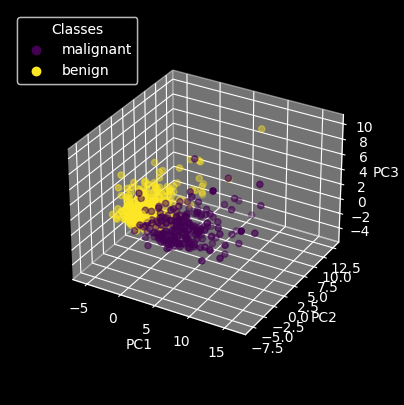

[0.44272026 0.18971182 0.09393163]


In [36]:
# create a 3d graph
fig = plt.figure(figsize=(5,5)) # creates a figure
axis = fig.add_subplot(projection='3d') # add 3d subplot to our figure, returns the variable for the axis
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)
axis.set_box_aspect(aspect=None, zoom=0.8) # zoom
scatter1 = axis.scatter3D(x[:,0],x[:,1],x[:,2], c=data['target']) # actually plots the data
legend1 = axis.legend(*[scatter1.legend_elements()[0], data['target_names']], loc="upper left", title="Classes") # legend data
axis.add_artist(legend1)

plt.show()
# variance
print(principal.explained_variance_ratio_)